# KSIF Libarary Tutorial
This file shows how to use KSIF package using a simple example.
You have to notice that the package is based on pre-existing package 'bt' and 'ffn'.
See docs for more information.  
  
@KAIST Student Investment Fund  

*Seung Hyeon Yu*  
(rambor12@business.kaist.ac.kr)

In [2]:
import KSIF as kf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Get data 
There are two ways to get the data.  
1. **web** : This method is fundamentally using pandas_Datareader.  
2. **pandas read_csv** : This method can read csv file formally.

If you don't explicitly write down the .csv file, 'get' function will get data from the web automatically.  
For example, you can download KOSPI, KOSDAQ, KOSPI200, KOSPI small Index using 'get' function.

In [4]:
data = kf.get('KOSPI, kosdaq, kospi200, kospismall',start='2010-01-01')

In [5]:
data

,kospi,kosdaq,kospi200,kospismall
Date,,,,
2013-03-04,2013.150024,537.380005,266.14,1382.60
2013-03-05,2016.609985,543.960022,266.54,1392.15
2013-03-06,2020.739990,544.359985,267.25,1396.39
2013-03-07,2004.400024,541.299988,264.78,1389.97
2013-03-08,2006.010010,543.099976,264.57,1393.71
2013-03-15,1986.500000,554.809998,260.84,1419.13
2013-03-22,1948.709961,551.250000,255.33,1405.84
2013-04-05,1927.229980,547.510010,252.77,1409.46
2013-04-08,1918.689941,528.780029,252.39,1384.52


# 2. Make Strategy
The 'Strategy' need 2 arguments: strategy name and 'algos'.  
1. **strategy name** : (e.g) 투자전략1호, SPP 가치투자전략 버전 1.2, EPT-Momentum, Passive01 etc...
2. **algos** : The building blocks of strategy. You have to make your own 'algo'.  


Even though you have to make your own 'algo', KSIF package provide some basic 'algos'.  
1. **Run(Daily, Monthly, Quarterly)** : this algo makes other algos run only once in a (Day, Month, Quarter).
2. **Select(All, Randomly, Where)** : this algo select specific Securities based on 'signal'.
3. **WeighEqually** : this algo set the weight of securities equally.
4. **Rebalanced** : Rebalance based on the weight of selected securities.
5. **LossCut** : If there is a security have a return below certain level, cut off.

In [6]:
s = kf.Strategy('SPP Team3', [kf.algos.RunDaily(), kf.algos.SelectRandomly(), kf.algos.WeighEqually(), kf.algos.Rebalance()])

## 3. Make Backtest Instance
The 'Backtest' need 2 arguments: strategy and price data.

In [7]:
test = kf.Backtest(s, data)

## 4. Run
You have to save the result object.

In [8]:
res = kf.run(test)

SPP Team3
0%                          100%
[##############################] | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:01 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00 | ETA: 00:00:00
Total time elapsed: 00:00:01


After you run the backtest, you can see the summary statistics.

In [9]:
res.display()

Stat                 SPP Team3
-------------------  -----------
Start                2013-03-04
End                  2017-01-03
Risk-free rate       0.00%

Total Return         14.12%
Daily Sharpe         0.37
CAGR                 3.50%
Max Drawdown         -16.96%

MTD                  0.87%
3m                   -2.25%
6m                   -0.57%
YTD                  0.87%
1Y                   1.77%
3Y (ann.)            6.06%
5Y (ann.)            3.50%
10Y (ann.)           3.50%
Since Incep. (ann.)  3.50%

Daily Sharpe         0.37
Daily Mean (ann.)    4.57%
Daily Vol (ann.)     12.39%
Daily Skew           -0.62
Daily Kurt           2.92
Best Day             3.05%
Worst Day            -3.89%

Monthly Sharpe       0.46
Monthly Mean (ann.)  4.38%
Monthly Vol (ann.)   9.55%
Monthly Skew         -0.51
Monthly Kurt         0.52
Best Month           4.91%
Worst Month          -7.95%

Yearly Sharpe        0.87
Yearly Mean          4.11%
Yearly Vol           4.75%
Yearly Skew          1.56
Ye

Also you can see the portfolios with the positions.

In [10]:
test.portfolios

Date                  
2013-03-04  kosdaq           0.0
            kospi            0.0
            kospi200         0.0
            kospismall       0.0
2013-03-05  kosdaq         459.0
            kospi          123.0
            kospi200       937.0
            kospismall     179.0
2013-03-06  kosdaq         457.0
            kospi          123.0
            kospi200       932.0
            kospismall     178.0
2013-03-07  kosdaq         457.0
            kospi          123.0
            kospi200       934.0
            kospismall     178.0
2013-03-08  kosdaq         456.0
            kospi          123.0
            kospi200       937.0
            kospismall     177.0
2013-03-15  kosdaq         448.0
            kospi          125.0
            kospi200       954.0
            kospismall     175.0
2013-03-22  kosdaq         445.0
            kospi          125.0
            kospi200       961.0
            kospismall     174.0
2013-04-05  kosdaq         445.0
            kospi   

Here is a plot the graph.

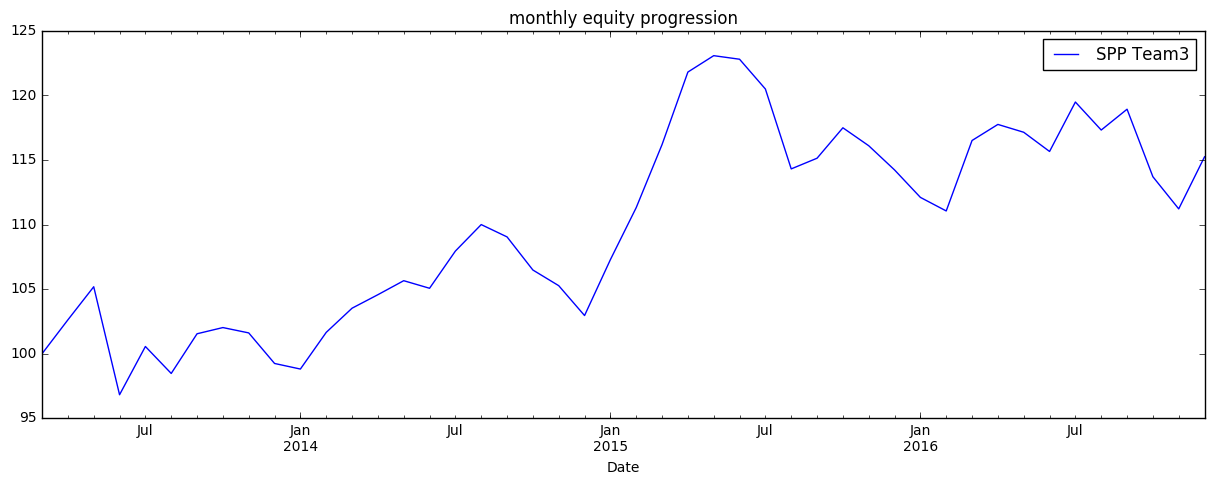

In [11]:
res.plot()
plt.show()

Also you can see the histogram of return.

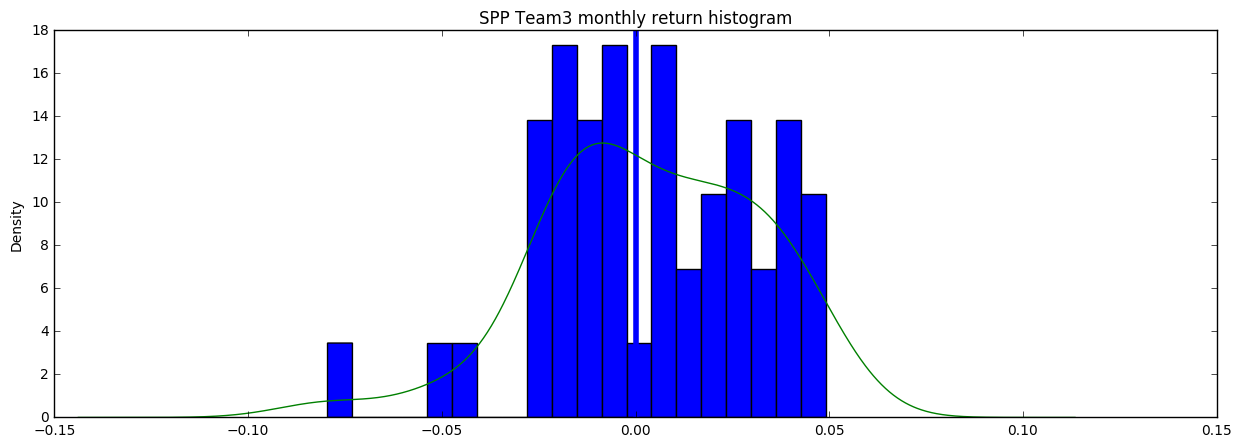

In [12]:
res.plot_histogram()
plt.show()

The whole backtest result can be saved as 'log file'. You can reuse this log file to backtest again.

In [13]:
res.save()

True

Tutorial End.